## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Juan Pablo
- Apellido: Orciuoli
- Legajo: 163.684-4

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
# Importo el dataset, desde la misma carpeta
diabetes_df = pd.read_csv('ClusterAI_TP_dataset_diabetes.csv')

#Verifico que se haya cargado correctamente
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
# Dimensiones con funcion np.shape()
print('Las dimension del dataset es de', np.shape(diabetes_df))

Las dimension del dataset es de (768, 9)


In [4]:
# Dimensiones con filas y columnas por separado

# Filas tomando el primer valor de las dimensiones
filas = np.shape(diabetes_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

# Columnas tomando el segundo valor de las dimensiones [1]
columnas = np.shape(diabetes_df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}')

Filas: 768
Columnas: 9


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información

# En una sola linea de codigo veo columnas, tipos de dato y cantidad de NO nulos
# Queda implícito que hay 0 valores nulos
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Si quisiera ver explícitamente la cantidad de nulos (pero en más de una línea de codigo):

# Cantidad de valores nulos
nulos = diabetes_df.isnull().sum()
# Tipo de dato
datatype = diabetes_df.dtypes
# Tabla con ambos resultados
objetivo_3 = pd.concat([nulos, datatype], axis=1, keys=['Nulos', 'DataType'])
objetivo_3

,Nulos,DataType
Pregnancies,0,int64
Glucose,0,int64
BloodPressure,0,int64
SkinThickness,0,int64
Insulin,0,int64
BMI,0,float64
DiabetesPedigreeFunction,0,float64
Age,0,int64
Outcome,0,int64


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

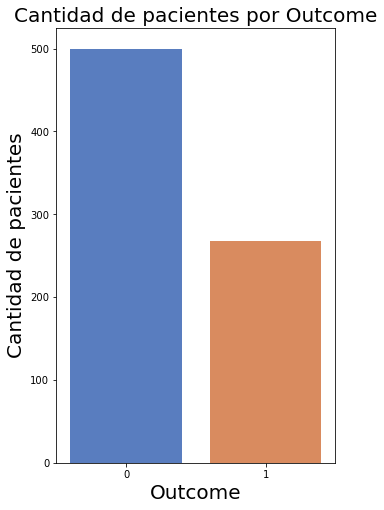

In [7]:
# Utilizo gráfico de barras por tratarse de una variable de clase:
plt.figure(figsize=(5,8))

g = sns.countplot(data=diabetes_df,
                  x="Outcome",
                  palette = "muted")

plt.title('Cantidad de pacientes por Outcome', size = 20)
plt.xlabel("Outcome", size = 20)
plt.ylabel("Cantidad de pacientes", size = 20)
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [8]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

Text(0.5, 1.03, 'Pairplot')

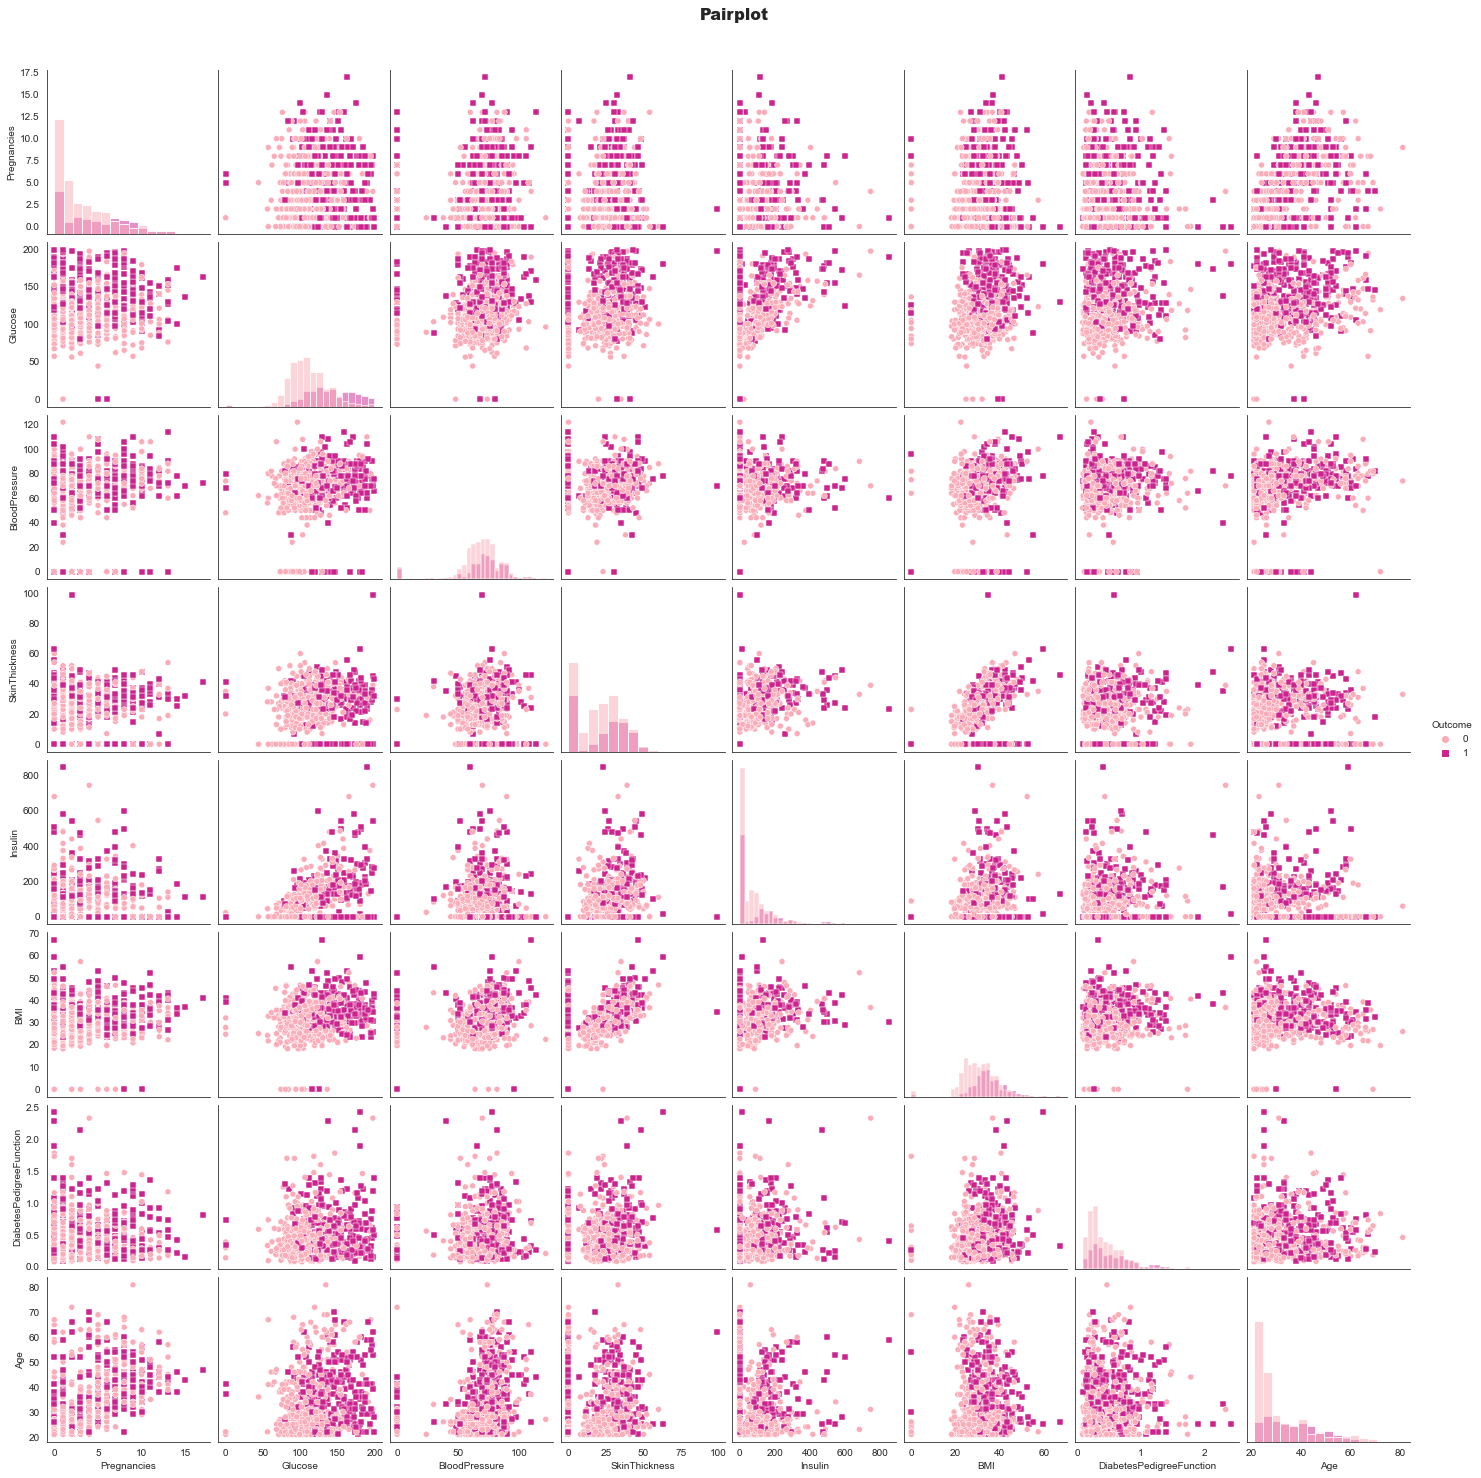

In [9]:
# Seteo de Tema
sns.set_style('white')
vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Creo el pairplot
pairplot = sns.pairplot(diabetes_df, hue = 'Outcome', diag_kind = 'hist', palette = 'RdPu', markers = ['o', 's'], 
                        vars = vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', 
                      fontfamily = 'sans-serif')

#### El nivel de glucosa parece ser la variable que mejor segmenta a los pacientes que tienen diabetes. A medida que aumenta el nivel de glucosa, aumenta la proporción de pacientes diabéticos.
#### Pareciera que el BMI también se correlaciona con el Outcome (mayor BMI, más probabilidad de tener diabetes), aunque no tan claramente como el caso de la glucosa.
#### En las demás features no se alcanza a ver una segmentación tan marcada
#### Muchas variables tienen valores en 0 (BloodPressure, SkinThickness, Insuline, BMI) que podrían ser errores que habría que limpiar

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

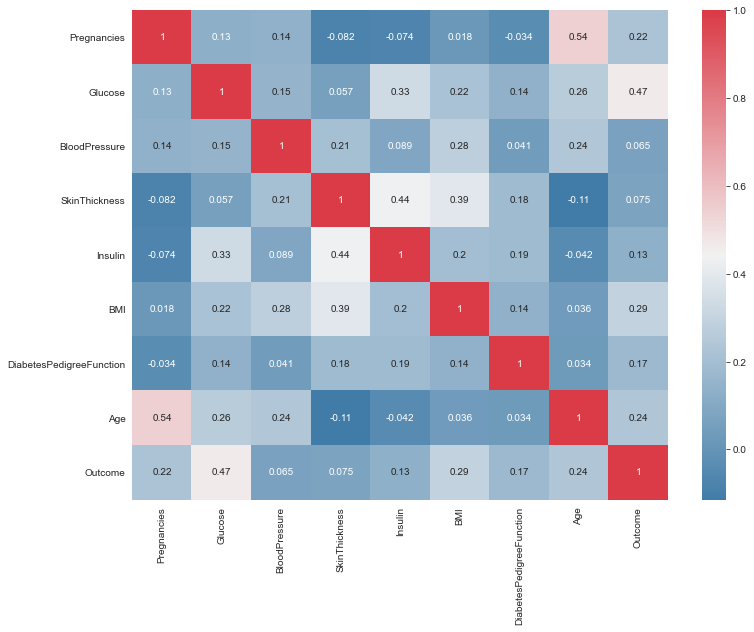

In [10]:
corrmat = diabetes_df.corr()

f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

#### Los dos pares de variables más correlacionados son el número de embarazos con la edad, y el nivel de glucosa con la presencia de la enfermedad

Tienen un valor de 0.54 y 0.47 respectivamente. Ambas son correlaciones positivas: a mayor edad, mayor número de embarazos; a mayor nivel de glucosa, mayor probabilidad de tener diabetes

El nivel de glucosa puede ser la variable más útil a la hora de predecir si un paciente tiene o no diabetes.

La correlación entre la edad y la cantidad de embarazos es esperable por razones biológicas. Podría servir para eliminar alguna de estas dos variables y así simplificar el modelo con el que se va a querer predecir la enfermedad, excepto que se observe alguna combinación de estas dos variables que sea un buen predictor (ej. personas con muchos embarazos siendo jóvenes)

##### **Objetivo 8**
Hacer un histograma de la variable BMI

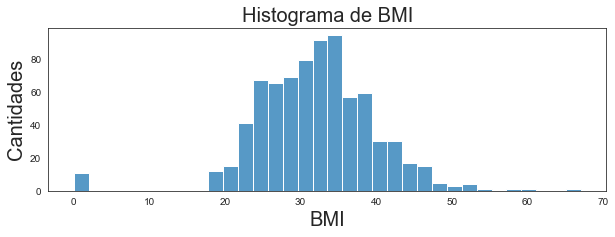

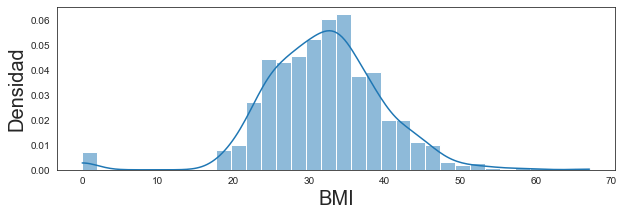

In [11]:
plt.figure(figsize=(10,3))
sns.histplot(data=diabetes_df,
             x='BMI',stat='count',kde=False)
plt.xlabel("BMI",size = 20)
plt.ylabel("Cantidades",size = 20)

plt.title('Histograma de BMI',size = 20)
plt.show()


plt.figure(figsize=(10,3))
sns.histplot(data=diabetes_df,
             x='BMI',stat='density',kde=True)
plt.xlabel("BMI",size = 20)
plt.ylabel("Densidad",size = 20)

plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

#### Sí, se observan valores extraños con BMI cercanos o iguales a 0

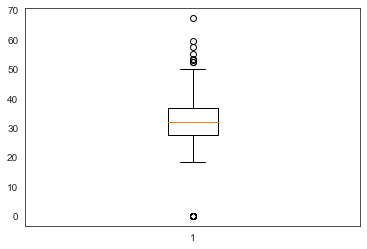

In [12]:
bxplot = plt.boxplot(diabetes_df['BMI'])

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [13]:
# Veo outliers
outliers = bxplot["fliers"][0].get_ydata()
outliers

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
       53.2, 55. , 67.1, 52.3, 52.3, 52.9, 59.4, 57.3])

In [14]:
# Mantengo solo los valores que no están en la lista de outliers
diabetes_df_2 = diabetes_df[~diabetes_df['BMI'].isin(outliers)]

In [15]:
# Verifico que (filas df original) - (longitud outliers) = (filas nuevo df)
np.shape(diabetes_df)[0] - len(outliers) == np.shape(diabetes_df_2)[0]

True

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

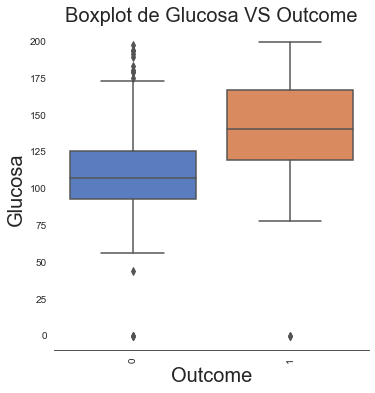

In [16]:
g = sns.catplot(data=diabetes_df,
                x="Outcome",y="Glucose", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=1)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Outcome",size = 20)
plt.ylabel("Glucosa",size = 20)
plt.title('Boxplot de Glucosa VS Outcome',size = 20)
plt.show()

#### Se observa una diferencia significativa entre los niveles de glucosa en pacientes con y sin diabetes. Confirma lo mencionado en el objetivo 6 (Pairplot) y objetivo 7 (heatmap). Es decir, el nivel de glucosa sería un buen predictor de la diabetes

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

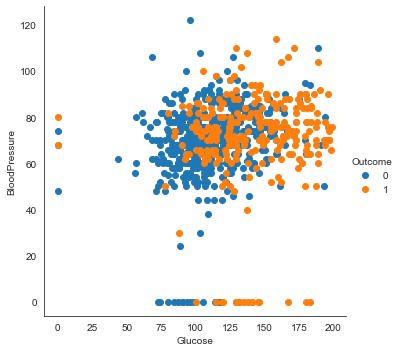

In [17]:
sns.FacetGrid(diabetes_df, hue="Outcome", height=5) \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend()

#### Se observa la relación ya mencionada entre la diabetes y el nivel de glucosa. Pero la presión sanguínea no parece tener mucha correlación con el Outcome (como se puede ver también en el heatmap)
#### Entre ambas variables no se observa una correlación fuerte (también puede verse en el heatmap)
#### Sí se observan mediciones con valores en 0 para ambas variables, que serían outliers

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [18]:
# Nueva columna con los rangos
diabetes_df.loc[diabetes_df['Age'] < 30, 'AgeBand'] = 'Menor a 30 años'
diabetes_df.loc[(diabetes_df['Age'] >= 30) & (diabetes_df['Age'] <= 40), 'AgeBand']   = 'Entre 30 y 40 años'
diabetes_df.loc[diabetes_df['Age'] > 40, 'AgeBand']   = 'Mayor a 40 años'

In [19]:
# Verifcación rápida
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBand
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40 años
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40 años
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40 años
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30 años
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40 años
5,5,116,74,0,0,25.6,0.201,30,0,Entre 30 y 40 años
6,3,78,50,32,88,31.0,0.248,26,1,Menor a 30 años
7,10,115,0,0,0,35.3,0.134,29,0,Menor a 30 años
8,2,197,70,45,543,30.5,0.158,53,1,Mayor a 40 años
9,8,125,96,0,0,0.0,0.232,54,1,Mayor a 40 años


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

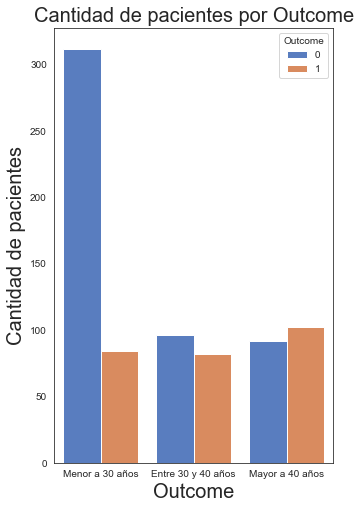

In [20]:
plt.figure(figsize=(5,8))

g = sns.countplot(data=diabetes_df,
                  x="AgeBand",
                  hue="Outcome",
                  order=["Menor a 30 años", "Entre 30 y 40 años", "Mayor a 40 años"],
                  palette = "muted")

plt.title('Cantidad de pacientes por Outcome', size = 20)
plt.xlabel("Outcome", size = 20)
plt.ylabel("Cantidad de pacientes", size = 20)
plt.show()

#### Los pacientes menores a 30 años tienen pocas posibilidades de tener diabetes, los mayores a 30 años están más equilibrados. Incluso en los mayores a 40 años, hay más pacientes diabéticos que no diabéticos.
#### Se concluiría que a mayor edad, hay mayor riesgo de padecer diabetes.

#### Obs: hay mucha más cantidad de pacientes menores a 30 años que en los otros rangos. Podría suceder que los jóvenes acudan más al médico, mientras que los mayores a 30 años solamente acuden en caso de tener síntomas más certeros. Si sucediese algo de este estilo, no se podría asegurar que la edad se correlacione con la enfermedad, ya que la distribución de pacientes sanos/enfermos en cada rango etario sería diferente por razones ajenas a la enfermedad.